In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("C:/Users/ASUS/Downloads/Data_Train.csv")
df.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [3]:
df['Minimum_Order'] = df['Minimum_Order'].str.replace('₹', '')
df['Minimum_Order'] = df['Minimum_Order'].astype(int)
df['Minimum_Order']=df['Minimum_Order'].astype('str').astype('float')

In [4]:
df['Restaurant'] = df['Restaurant'].str.replace('ID_', '')
df['Restaurant'] = df['Restaurant'].astype(int)
df['Restaurant'] = df['Restaurant'].astype('str').astype('float')

In [5]:
df['Average_Cost'] = df['Average_Cost'].str.replace('₹', '').replace('for', '200').replace('', '200')
df['Average_Cost'] = df['Average_Cost'].str.replace(',', '')
df['Average_Cost'] = df['Average_Cost'].astype(int)
df['Average_Cost'] = df['Average_Cost'].astype('str').astype('float')

In [6]:
df['Delivery_Time'] = df['Delivery_Time'].str.replace('minutes', '')
df['Delivery_Time']=df['Delivery_Time'].astype('str').astype('float')

In [7]:
#replaced '-' with mean of other values in the column

In [8]:
reviews_array = df[df["Reviews"]!='-']["Reviews"]
df["Reviews"] = df["Reviews"].replace('-',reviews_array.astype(float).mean())


Votes_array = df[df["Votes"]!='-']["Votes"]
df["Votes"] = df["Votes"].replace('-',Votes_array.astype(float).mean())

In [9]:
Votes_array.astype(float).mean()

244.54445676274943

In [10]:
df["rating1"] = df[(df["Rating"]!='-')]["Rating"]
df["rating1"] = df[(df["rating1"]!='NEW')]["rating1"]
df["rating1"] = df[(df["rating1"]!='Opening Soon')]["rating1"]
df["rating1"] = df[(df["rating1"]!='Temporarily Closed')]["rating1"]
df["rating1"].dropna(how='any',inplace=True)
df["rating1"].astype('str').astype('float')
Rating_array = df["rating1"]
a = Rating_array.astype('float').mean()

In [11]:
#replaced all new values ,opening soon and temporarily closed values by 0

In [12]:
df['Rating'] = df['Rating'].replace('-',a).str.replace('NEW', '0').replace('Opening Soon', '0').replace('Temporarily Closed', '0')
df.describe(include='all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,rating1
count,11094.000000,11094,11094,11094.000000,11094.000000,9903,11094.000000,11094.000000,11094.000000,9131
unique,NaN,35,2179,NaN,NaN,30,1103.000000,761.000000,NaN,29
top,NaN,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,NaN,NaN,3.7,244.544457,123.247893,NaN,3.7
freq,NaN,947,850,NaN,NaN,869,2074.000000,2312.000000,NaN,869
mean,4333.719127,NaN,NaN,202.708671,53.344511,NaN,NaN,NaN,37.056066,NaN
std,2507.784250,NaN,NaN,129.833261,18.551245,NaN,NaN,NaN,12.447496,NaN
min,0.000000,NaN,NaN,50.000000,0.000000,NaN,NaN,NaN,10.000000,NaN
25%,2140.250000,NaN,NaN,100.000000,50.000000,NaN,NaN,NaN,30.000000,NaN
50%,4361.000000,NaN,NaN,200.000000,50.000000,NaN,NaN,NaN,30.000000,NaN
75%,6523.750000,NaN,NaN,200.000000,50.000000,NaN,NaN,NaN,45.000000,NaN


In [13]:
df["Rating"].fillna(a,inplace=True)
df["Rating"].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2',
       3.6134596429744668, '2.8', '3.0', '3.3', '3.1', '4.7', '3.4',
       '4.1', '0', '2.9', '4.6', '4.3', '2.6', '4.5', '4.4', '4.8', '2.4',
       '2.7', '2.5', '2.2', '4.9', '2.3', '2.1'], dtype=object)

In [14]:
df.drop(columns='rating1',inplace=True)
df.describe(include='all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094.000000,11094,11094,11094.000000,11094.000000,11094.00000,11094.000000,11094.000000,11094.000000
unique,NaN,35,2179,NaN,NaN,31.00000,1103.000000,761.000000,NaN
top,NaN,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,NaN,NaN,3.61346,244.544457,123.247893,NaN
freq,NaN,947,850,NaN,NaN,1191.00000,2074.000000,2312.000000,NaN
mean,4333.719127,NaN,NaN,202.708671,53.344511,NaN,NaN,NaN,37.056066
std,2507.784250,NaN,NaN,129.833261,18.551245,NaN,NaN,NaN,12.447496
min,0.000000,NaN,NaN,50.000000,0.000000,NaN,NaN,NaN,10.000000
25%,2140.250000,NaN,NaN,100.000000,50.000000,NaN,NaN,NaN,30.000000
50%,4361.000000,NaN,NaN,200.000000,50.000000,NaN,NaN,NaN,30.000000
75%,6523.750000,NaN,NaN,200.000000,50.000000,NaN,NaN,NaN,45.000000


In [15]:
df['Reviews']=df['Reviews'].astype('str').astype('float')
df['Rating']=df['Rating'].astype('str').astype('float')
df['Votes']=df['Votes'].astype('str').astype('float')

In [16]:
df.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,6321.0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,30.0
1,2882.0,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,30.0
2,1595.0,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,65.0
3,5929.0,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,30.0
4,6123.0,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,65.0


In [17]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import r2_score

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
from xgboost import XGBClassifier

In [20]:
X = df [['Restaurant','Average_Cost','Minimum_Order','Rating','Votes','Reviews']]
Y = df['Delivery_Time']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
ypred1=xgb.predict(X_test)

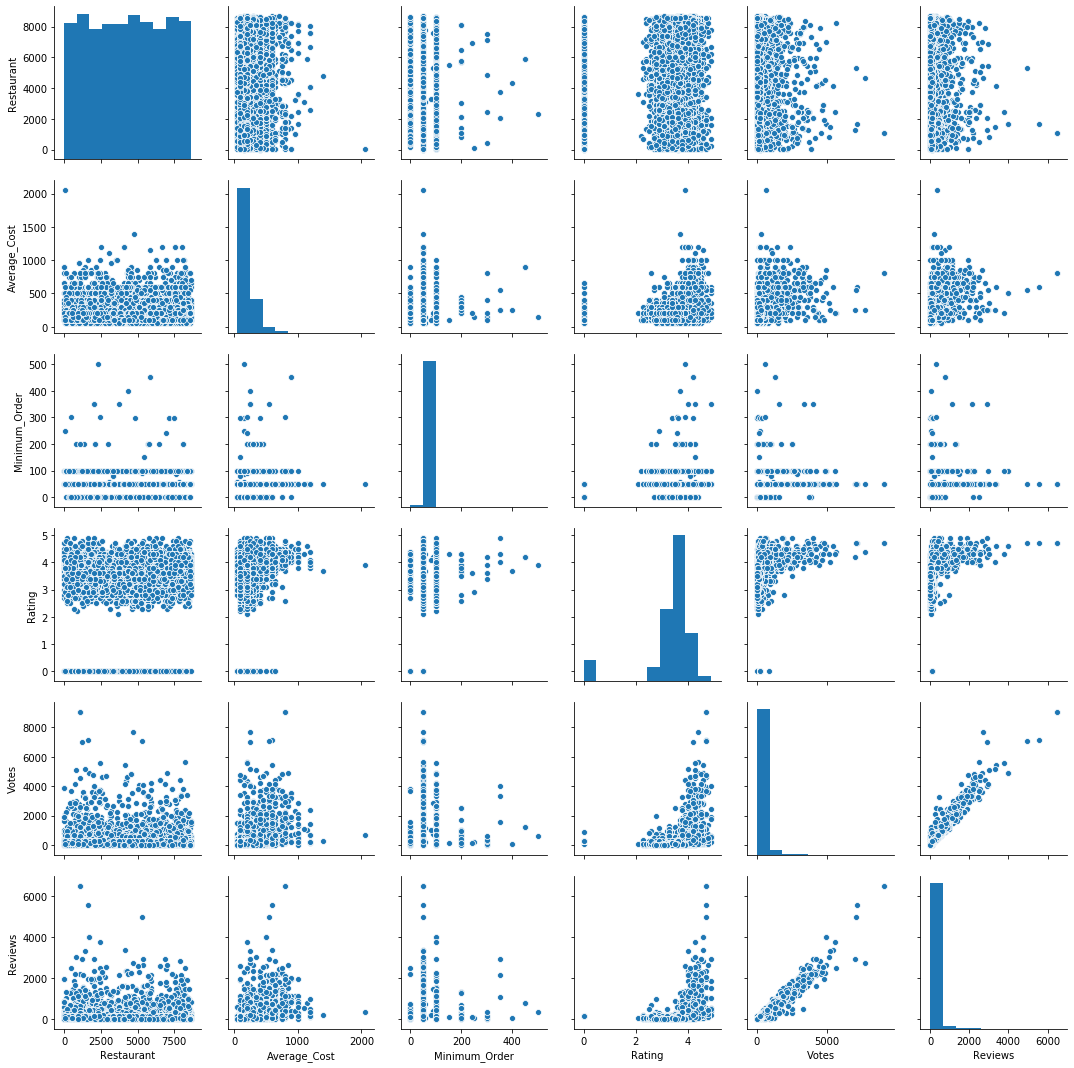

In [21]:
import seaborn
seaborn.pairplot(X)

In [22]:
import sklearn
sklearn.metrics.r2_score(y_test, ypred1)

0.054254258351739915

In [23]:
(np.sqrt(mean_squared_error(y_test, ypred1)))

12.10914387890184

In [24]:
df['Reviews'].unique()
df[df['Reviews']=='inf']

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time


In [25]:
df[df.isnull().any(axis=1)]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time


In [26]:

from sklearn import linear_model
regr = linear_model.LinearRegression()
model1 = regr.fit(X_train, y_train)

In [27]:
pred = model1.predict(X_test)
(np.sqrt(mean_squared_error(y_test, pred)))

11.73750376606729

In [28]:
import sklearn
sklearn.metrics.r2_score(y_test, pred)

0.11141494452491552

In [29]:
rr = Ridge(alpha=0.1)
model2 = rr.fit(X_train, y_train) 
pred_test_rr= model2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

11.737503545623001
0.11141497790228494


In [30]:
la = Lasso(alpha=0.1)
la.fit(X_train, y_train) 
pred_test_la= la.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_la)))
print(r2_score(y_test, pred_test_la))

11.736673180927705
0.11154069859388205


In [31]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

11.737350414400241
0.11143816327945177


In [32]:
df1 = df['Cuisines'].str.split(', ', expand=True)

In [33]:
pd.concat([df, df1], axis=1, join='inner')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,0,1,2,3,4,5,6,7
0,6321.0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.50000,12.000000,4.000000,30.0,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,2882.0,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.50000,11.000000,4.000000,30.0,Ice Cream,Desserts,None,None,None,None,None,None
2,1595.0,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.60000,99.000000,30.000000,65.0,Italian,Street Food,Fast Food,None,None,None,None,None
3,5929.0,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.70000,176.000000,95.000000,30.0,Mughlai,North Indian,Chinese,None,None,None,None,None
4,6123.0,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.20000,521.000000,235.000000,65.0,Cafe,Beverages,None,None,None,None,None,None
5,5221.0,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150.0,50.0,3.80000,46.000000,18.000000,30.0,South Indian,North Indian,Chinese,None,None,None,None,None
6,3777.0,Mumbai Central,"Beverages, Fast Food",150.0,50.0,3.70000,108.000000,31.000000,30.0,Beverages,Fast Food,None,None,None,None,None,None
7,745.0,Delhi University-GTB Nagar,"Chinese, Thai, Asian",650.0,50.0,4.00000,1731.000000,1235.000000,45.0,Chinese,Thai,Asian,None,None,None,None,None
8,2970.0,Delhi University-GTB Nagar,"Mithai, Street Food",100.0,50.0,3.90000,110.000000,26.000000,30.0,Mithai,Street Food,None,None,None,None,None,None
9,3474.0,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",200.0,50.0,3.90000,562.000000,294.000000,65.0,Fast Food,North Indian,Rolls,Chinese,Momos,Mughlai,None,None


In [34]:
df2 = df.merge(df1,right_index = True, left_index = True).drop(['Cuisines'], axis = 1)
df2.head(5)

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,0,1,2,3,4,5,6,7
0,6321.0,"FTI College, Law College Road, Pune",200.0,50.0,3.5,12.0,4.0,30.0,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,2882.0,"Sector 3, Marathalli",100.0,50.0,3.5,11.0,4.0,30.0,Ice Cream,Desserts,None,None,None,None,None,None
2,1595.0,Mumbai Central,150.0,50.0,3.6,99.0,30.0,65.0,Italian,Street Food,Fast Food,None,None,None,None,None
3,5929.0,"Sector 1, Noida",250.0,99.0,3.7,176.0,95.0,30.0,Mughlai,North Indian,Chinese,None,None,None,None,None
4,6123.0,"Rmz Centennial, I Gate, Whitefield",200.0,99.0,3.2,521.0,235.0,65.0,Cafe,Beverages,None,None,None,None,None,None


In [35]:
df3 = df2["Location"].apply(lambda x: x.split(","))
df4 = df3.apply(lambda x: " ".join(x[-1].split()[0]))
df5 = df2.merge(df4,right_index = True, left_index = True).drop(['Location_x'], axis = 1)

In [36]:
df6 = df5.melt(id_vars = ['Restaurant', 'Location_y', 'Average_Cost',
                    'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Delivery_Time'], value_name = "ingredient")
df6 = df6.drop(['variable'], axis = 1)
df6.head(5)

,Restaurant,Location_y,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,ingredient
0,6321.0,P u n e,200.0,50.0,3.5,12.0,4.0,30.0,Fast Food
1,2882.0,M a r a t h a l l i,100.0,50.0,3.5,11.0,4.0,30.0,Ice Cream
2,1595.0,M u m b a i,150.0,50.0,3.6,99.0,30.0,65.0,Italian
3,5929.0,N o i d a,250.0,99.0,3.7,176.0,95.0,30.0,Mughlai
4,6123.0,W h i t e f i e l d,200.0,99.0,3.2,521.0,235.0,65.0,Cafe


In [37]:
df6.shape

(88752, 9)

In [38]:
df6 = df6.drop(df6[df6['ingredient'] == "None"].index)
df6.shape

(88752, 9)

In [39]:
df6.ingredient.value_counts()

North Indian        4798
Chinese             3459
Fast Food           3068
Beverages           1436
Desserts            1245
South Indian        1196
Biryani              935
Mughlai              889
Street Food          770
Bakery               698
Italian              596
Continental          561
Pizza                497
Rolls                493
Cafe                 476
Ice Cream            386
Burger               330
Momos                314
Mithai               302
Healthy Food         288
Sandwich             261
Salad                232
Asian                213
Seafood              197
Thai                 174
Kebab                167
Juices               154
American             141
Mexican              119
Bengali              113
                    ... 
German                 8
Poké                   8
Naga                   6
Konkan                 6
Bubble Tea             6
Brazilian              5
French                 5
Turkish                5
Frozen Yogurt          4


In [40]:
len(df6.ingredient.unique())

102

In [41]:
a = []
for y in df6.ingredient.unique():
    a.append(y)

In [42]:
b = []
for x in range(len(df6.ingredient.unique())):
  b.append(x+1)
len(b)

102

In [43]:
c = []
for y in df6.Location_y.unique():
    c.append(y)
len(c)

17

In [44]:
d = []
for x in range(len(df6.Location_y.unique())):
  d.append(x+1)
len(d)

17

In [45]:
df6.Location_y.unique()

array(['P u n e', 'M a r a t h a l l i', 'M u m b a i', 'N o i d a',
       'W h i t e f i e l d', 'D e l h i', 'M a h a r a s h t r a',
       'T i m a r p u r', 'K o l k a t a', 'B a n g a l o r e',
       'G u r g o a n', 'B e g u m p e t', 'M a j e s t i c', 'I n d i a',
       'H y d e r a b a d', 'G u r g a o n', 'E l e c t r o n i c'],
      dtype=object)

In [46]:
df6.Location_y = df6.Location_y.replace(to_replace =c,value =d) 

In [47]:
df6.ingredient = df6.ingredient.replace(to_replace =a,value =b) 

In [48]:
df6.dtypes

Restaurant       float64
Location_y         int64
Average_Cost     float64
Minimum_Order    float64
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time    float64
ingredient         int64
dtype: object

In [49]:
X = df6 [['Restaurant','Average_Cost','Minimum_Order','Rating','Votes','Reviews','ingredient','Location_y']]
Y = df6['Delivery_Time']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=9)
from sklearn import linear_model
regr = linear_model.LinearRegression()
model = regr.fit(X_train, y_train)

In [50]:
pred = model.predict(X_test)
(np.sqrt(mean_squared_error(y_test, pred)))

11.64683308053855

In [51]:
xgb.fit(X_train,y_train)
ypred1=xgb.predict(X_test)

In [52]:
sklearn.metrics.r2_score(y_test, ypred1)

0.11078503826500352

In [54]:
import sklearn
sklearn.metrics.r2_score(y_test, pred)

0.12148550169949102

In [55]:
df6 = df6.reindex(columns=['Restaurant','Location_y','Average_Cost','Minimum_Order','Rating','Votes','Reviews','ingredient','Delivery_Time'])
df6.head(5)

,Restaurant,Location_y,Average_Cost,Minimum_Order,Rating,Votes,Reviews,ingredient,Delivery_Time
0,6321.0,1,200.0,50.0,3.5,12.0,4.0,1,30.0
1,2882.0,2,100.0,50.0,3.5,11.0,4.0,2,30.0
2,1595.0,3,150.0,50.0,3.6,99.0,30.0,3,65.0
3,5929.0,4,250.0,99.0,3.7,176.0,95.0,4,30.0
4,6123.0,5,200.0,99.0,3.2,521.0,235.0,5,65.0


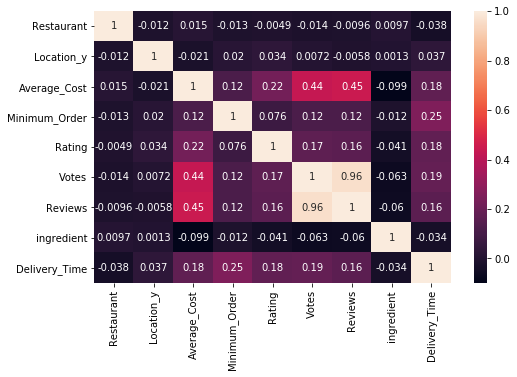

In [56]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.heatmap(df6.corr(), annot=True)

In [57]:
df7=pd.read_csv("C:/Users/ASUS/Downloads/Data_Test.csv")
df7.shape

(2774, 8)

In [58]:
df7['Minimum_Order'] = df7['Minimum_Order'].str.replace('₹', '')
df7['Minimum_Order'] = df7['Minimum_Order'].astype(int)
df7['Minimum_Order']=df7['Minimum_Order'].astype('str').astype('float')
df7['Restaurant'] = df7['Restaurant'].str.replace('ID_', '')
df7['Restaurant'] = df7['Restaurant'].astype(int)
df7['Restaurant'] = df7['Restaurant'].astype('str').astype('float')
df7['Average_Cost'] = df7['Average_Cost'].str.replace('₹', '')
df7['Average_Cost'] = df7['Average_Cost'].str.replace(',', '')
df7['Average_Cost']=df7['Average_Cost'].astype('str').astype('float')
df7['Reviews'] = df7['Reviews'].str.replace('-', '0')
df7['Reviews']=df7['Reviews'].astype('str').astype('float')
df7['Rating'] = df7['Rating'].str.replace('NEW', '-1')
df7['Rating'] = df7['Rating'].str.replace('-', '0')
df7['Rating'] = df7['Rating'].str.replace('Opening Soon', '-2')
df7['Rating']=df7['Rating'].astype('str').astype('float')
df7['Votes'] = df7['Votes'].str.replace('-', '0')
df7['Votes']=df7['Votes'].astype('str').astype('float')

In [59]:
X7 = df7 [['Restaurant','Average_Cost','Minimum_Order','Rating','Votes','Reviews']]

In [60]:
pred_delhivery_time = model1.predict(X7)

In [61]:
df7['Delivery_time']=pred_delhivery_time

In [62]:
df7.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_time
0,2842.0,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350.0,50.0,4.2,361.0,225.0,39.006194
1,730.0,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100.0,50.0,1.0,0.0,0.0,31.800139
2,4620.0,"Sector 1, Noida",Fast Food,100.0,50.0,3.6,36.0,16.0,35.492424
3,5470.0,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200.0,50.0,3.6,66.0,33.0,36.163669
4,3249.0,"Sector 1, Noida","Chinese, Fast Food",150.0,50.0,2.9,38.0,14.0,34.998343
